In [76]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

In [77]:
df_raw = pd.read_csv("/home/piai/Downloads/bigdata_lec/HMEQ.csv")

In [78]:
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [79]:
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [80]:
df_raw["JOB"].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)

In [81]:
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [82]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [83]:
df_raw_dummy.isnull().sum(axis = 0)

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [84]:
#목표 변수, 설명 변수 데이터 지정
df_raw_dummy_y = df_raw_dummy["BAD"]

df_raw_dummy_x = df_raw_dummy.drop("BAD", axis=1, inplace = False)


#결측치 제거는 위에서 회귀할때 해줬기 때문에 따로 안해주는것으로 한다.

In [85]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy_x, df_raw_dummy_y, test_size = 0.3,\
                                    random_state = 1234)

print("train X data size: {}".format(df_train_x.shape))
print("train Y data size: {}".format(df_train_y.shape))
print("test X data size: {}".format(df_test_x.shape))
print("test Y data size: {}".format(df_test_y.shape))

train X data size: (2623, 18)
train Y data size: (2623,)
test X data size: (1125, 18)
test Y data size: (1125,)


In [86]:
gb_uncustomized = GradientBoostingClassifier(random_state =1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))

#결측치 제거는 위에서 회귀할때 해줬기 때문에 따로 안해주는것으로 한다.
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.963
Accuracy on test set: 0.941


In [112]:
train_accuracy = []; test_accuracy = []

# para_lr = [lr * 0.1 for lr in range(1,10)]
para_lr = [lr * 0.01 for lr in range(1,20)] # 더 잘게 쪼개서 보기.

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["lr"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [113]:
df_accuracy_lr.round(3)
#결측치 제거는 위에서 회귀할때 해줬기 때문에 따로 안해주는것으로 한다.)

,lr,TrainAccuracy,TestAccuracy
0,0.01,0.933,0.927
1,0.02,0.939,0.932
2,0.03,0.942,0.936
3,0.04,0.948,0.940
4,0.05,0.952,0.940
5,0.06,0.957,0.940
6,0.07,0.958,0.940
7,0.08,0.961,0.939
8,0.09,0.964,0.943
9,0.10,0.963,0.941


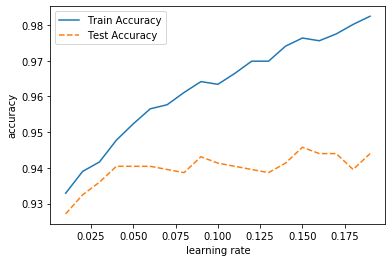

In [114]:
plt.plot(para_lr, train_accuracy, linestyle="-", label= "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

In [116]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n * 10 for n in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))learning rate
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    learning rate
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [117]:
df_accuracy_n.round(3)

,n,TrainAccuracy,TestAccuracy
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.939
7,80,0.960,0.939
8,90,0.961,0.940
9,100,0.963,0.941


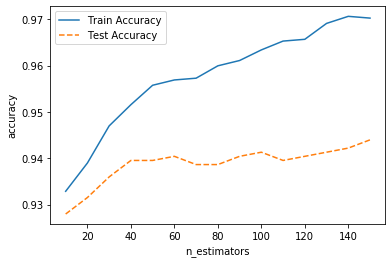

In [118]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()